Data: The dataset has future merchant transaction activity, for merchants that start over a 2 year period (2033-2034). The data spans from 1/1/33 through 12/31/34. Although the data is made up, you can consider this to be a random sample of future merchants using Stripe. Each observation is a transaction amount in cents. If the merchant stops processing with Stripe, then they would no longer appear.  

 

Questions:

* We have limited data on these merchants and their transactions, but we are still interested in understanding their payments activity to try to infer the types of merchants using Stripe. Using only the given data, how would you identify different kinds of businesses in the sample? Please generate assignments for each merchant.
* Sometimes a merchant may stop processing with Stripe, which we call churn. We are interested in identifying and predicting churn. Please a) come up with a concrete definition for churn b) identify merchants that have already churned in the dataset, and c) build a model to predict which active merchants are most likely to churn in the near future.

Dataset here.
 

We’re interested in how you solve business problems and your technical skills. Please include how we can apply this work and how that guides your analysis choices.

 

We're interested in your creativity with the data as well as how you communicate the results/insights. Please submit a write-up of your results in a format that can be presented to business teams (document or slides) as well as your code (Python or R). If you continue to the onsite interview, we will ask you to present your findings from your written project. Please don’t spend more than 4-6 hours on the project.

 

Please don't include your name in either the filename or body of your submission. If you'd like to include an HTML file as part of your submission, please upload it as part of a zip file. Finally, please provide an estimate of how much time you spent on the project.

 

 


Please submit here:
https://app.greenhouse.io/tests/c0c3c28498baf461430bf352faeb83ce?utm_medium=email&utm_source=TakeHomeTest

In [1]:
import numpy as np
import pandas as pd

### EDA

#### read data

In [6]:
df = pd.read_csv('takehome_ds_written.csv', index_col=0)

In [7]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [8]:
df.shape

(1513719, 3)

In [62]:
df.isna().any()

merchant               False
time                   False
amount_usd_in_cents    False
dtype: bool

In [14]:
df.time = df.time.apply(lambda x:pd.Timestamp(x))

In [15]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [19]:
len(df.merchant.unique())

14351

## Q1: Clustering
### use feature engineering to work with sales data for clustering purpose
Thoughts:
* sales feature(mean, variance)
* sales happens when(sales per day/week/month, time of the day morning, noon, night; start date on strip)
* model wise, can use kmeans or EM, elbow to decide number of clusters
* try deep learning for clustering? see if data is large enough

#### aggregate merchants

In [58]:
num_trans = df.groupby('merchant')['time'].count().sort_values(ascending=False).to_frame('counts')


### if transaction history too few, ignore them? why they not use anymore?
### any chance that they change names afterwards?

In [151]:
num_trans

,counts
merchant,
5608f200cf,25512
53b3fbeae2,12178
1ddaea9838,12042
89e2d29885,11969
654930c922,11222
...,...
69eff03b7e,1
69cbf327dd,1
69c5ae358e,1


In [263]:
num_trans[num_trans.counts.isin([2])]

,counts
merchant,
24d1a39c4e,2
097669f1f0,2
69d984dfd1,2
afe01f7a5b,2
6985004982,2
...,...
f03d773445,2
1732b09f94,2
5d94ff2ef6,2


#### power users take about 80% volume

In [159]:
num_trans[:int(len(num_trans)*0.10)].sum()/num_trans.sum()

counts    0.799639
dtype: float64

In [176]:
num_trans[num_trans.counts==1].shape#[-10:]

(1666, 1)

In [177]:
num_trans.shape

(14351, 1)

In [173]:
df[df.merchant.isin(['36fe55a483'])]

,merchant,time,amount_usd_in_cents
193410,36fe55a483,2033-12-23 19:05:00,163053
1200319,36fe55a483,2034-09-08 00:16:22,422585


In [175]:
df.set_index('merchant').loc[num_trans[num_trans.counts>=2][-10:].index]

,time,amount_usd_in_cents
merchant,,
36fe55a483,2033-12-23 19:05:00,163053
36fe55a483,2034-09-08 00:16:22,422585
f0cab880e5,2034-09-28 20:03:03,14355
f0cab880e5,2034-10-05 17:40:10,51177
b59b2000dc,2033-10-21 21:45:10,6632
b59b2000dc,2033-11-24 00:40:56,1398
c1c342ffe4,2034-12-27 19:25:42,24455
c1c342ffe4,2034-12-20 21:13:36,127028
5d70ad2a02,2033-12-01 00:54:14,108991


In [60]:
num_trans.describe()

,counts
count,14351.000000
mean,105.478294
std,527.717966
min,1.000000
25%,3.000000
50%,11.000000
75%,45.000000
max,25512.000000


#### get total counts of sales, first day on stripe, last day on stripe

In [76]:
def get_agg_merchants(df):
    start =  df.groupby('merchant')['time'].min().to_frame('start time')
    end = df.groupby('merchant')['time'].max().to_frame('end time')
    counts = df.groupby('merchant')['time'].count().to_frame('counts')#.sort_values(ascending=False).to_frame('counts')
    results = start.join(end).join(counts)
    return results.sort_values('counts',ascending=False)

In [77]:
agg_mer = get_agg_merchants(df)

In [82]:
agg_mer.head()

,start time,end time,counts
merchant,,,
5608f200cf,2033-03-29 21:21:57,2034-12-31 04:44:54,25512
53b3fbeae2,2033-11-29 20:40:04,2034-12-31 06:13:56,12178
1ddaea9838,2033-01-03 15:16:32,2034-12-31 07:23:54,12042
89e2d29885,2033-01-25 21:56:56,2034-12-31 02:05:34,11969
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222


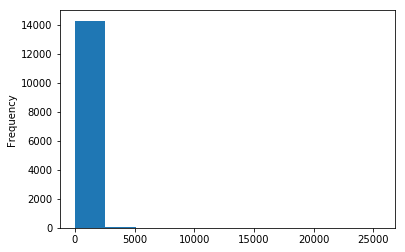

In [80]:
agg_mer.counts.plot.hist()

#### sales amount from the largest merchant in terms of sales

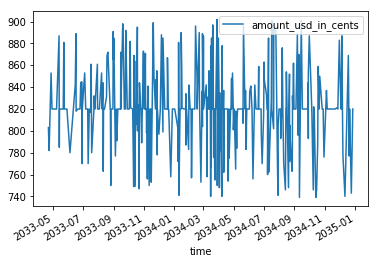

In [101]:
larget_mer = df.set_index('merchant').loc['5608f200cf']
larget_mer.sort_values('time')
larget_mer.set_index('time')
larget_mer[-400:].plot('time','amount_usd_in_cents')

In [94]:
larget_mer.amount_usd_in_cents.describe()

count    25512.000000
mean       819.675878
std         33.842892
min        382.000000
25%        820.000000
50%        820.000000
75%        820.000000
max        902.000000
Name: amount_usd_in_cents, dtype: float64

In [98]:

larget_mer.amount_usd_in_cents.unique()

array([789, 797, 820, 861, 841, 743, 901, 896, 819, 827, 890, 796, 804,
       897, 830, 787, 813, 748, 766, 784, 843, 757, 878, 806, 872, 798,
       869, 756, 885, 838, 888, 805, 891, 774, 785, 760, 777, 755, 821,
       808, 771, 833, 825, 876, 791, 862, 794, 783, 842, 779, 837, 793,
       746, 810, 800, 824, 868, 807, 851, 781, 758, 870, 879, 847, 894,
       759, 875, 767, 877, 892, 881, 790, 742, 778, 889, 761, 764, 765,
       740, 887, 849, 768, 898, 899, 751, 776, 902, 871, 782, 763, 762,
       893, 858, 754, 853, 859, 828, 812, 839, 850, 816, 802, 738, 852,
       882, 840, 739, 818, 817, 826, 880, 823, 836, 775, 855, 773, 741,
       860, 863, 753, 745, 815, 780, 747, 854, 750, 770, 792, 846, 865,
       744, 856, 811, 795, 844, 809, 831, 845, 832, 801, 867, 829, 857,
       834, 822, 873, 786, 866, 886, 883, 769, 864, 788, 752, 749, 848,
       884, 900, 803, 835, 895, 814, 772, 799, 874, 438, 434, 423, 444,
       382], dtype=int64)

#### check how many merchants stop business before end of 2034

In [111]:
early_exiter = agg_mer[agg_mer['end time']<pd.Timestamp(2034,12,30)]

In [108]:
early_exiter.head()

,start time,end time,counts
merchant,,,
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222
4ec0b84264,2033-05-11 22:08:32,2034-12-24 02:35:17,10213
7ebe98c24a,2033-12-15 21:20:36,2034-12-20 21:02:39,10208
36745cc693,2033-03-27 16:16:46,2034-12-16 07:19:43,9578
02c9bf7fcd,2033-08-27 01:41:52,2034-10-27 05:36:29,7108


In [112]:
early_exiter.shape

(12958, 3)

In [110]:
agg_mer.shape

(14351, 3)

In [116]:
agg_mer['end time'].apply(lambda x:pd.Timestamp.date(x)).describe()

count          14351
unique           714
top       2034-12-30
freq             787
Name: end time, dtype: object

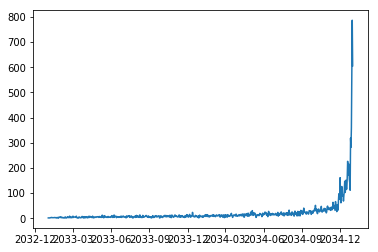

In [120]:
agg_mer['end time'].apply(lambda x:pd.Timestamp.date(x)).value_counts().plot()

In [121]:
merch_by_enddate = agg_mer['end time'].apply(lambda x:pd.Timestamp.date(x)).value_counts()

In [144]:
merch_by_enddate[100:]

2034-08-25    26
2034-10-30    26
2034-09-21    26
2034-11-23    26
2034-10-13    26
              ..
2033-02-13     1
2033-01-05     1
2033-02-14     1
2033-03-15     1
2033-07-24     1
Name: end time, Length: 614, dtype: int64

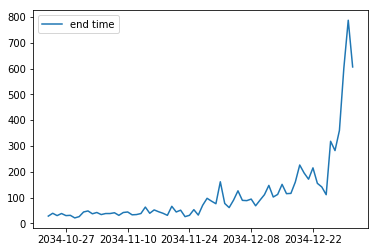

In [149]:
merch_by_enddate.to_frame().sort_index()[-70:].plot()

In [150]:
merch_by_enddate.to_frame().sort_index()[-70:].sum()

end time    7814
dtype: int64

#### time between trades

In [178]:
df.head()

,merchant,time,amount_usd_in_cents
1,faa029c6b0,2034-06-17 23:34:14,6349
2,ed7a7d91aa,2034-12-27 00:40:38,3854
3,5608f200cf,2034-04-30 01:29:42,789
4,15b1a0d61e,2034-09-16 01:06:23,4452
5,4770051790,2034-07-22 16:21:42,20203


In [254]:
df_ordered = df.sort_values('time')
df_ordered['next_tran_time'] = df_ordered.groupby(['merchant'])['time'].shift(-1)
df_ordered['time_diff'] = (df_ordered.next_tran_time-df_ordered.time).apply(lambda x:x.total_seconds())


In [190]:
df_ordered.head()

,merchant,time,amount_usd_in_cents,next_tran_time,time_diff
731682,3e72388b82,2033-01-01 09:38:32,4335,2033-01-04 05:52:43,2 days 20:14:11
157657,32cd721943,2033-01-01 12:53:52,6019,2033-01-01 15:25:09,0 days 02:31:17
1471395,a8ff2d667e,2033-01-01 15:08:55,3942,2033-01-01 15:34:17,0 days 00:25:22
1297306,cad5cd6286,2033-01-01 15:16:32,1926,2033-01-05 16:26:50,4 days 01:10:18
1409868,878047f4b9,2033-01-01 15:19:16,4839,2033-01-01 20:24:49,0 days 05:05:33


In [251]:
df_ordered.head()

,merchant,time,amount_usd_in_cents,next_tran_time,time_diff
731682,3e72388b82,2033-01-01 09:38:32,4335,2033-01-04 05:52:43,245651.0
157657,32cd721943,2033-01-01 12:53:52,6019,2033-01-01 15:25:09,9077.0
1471395,a8ff2d667e,2033-01-01 15:08:55,3942,2033-01-01 15:34:17,1522.0
1297306,cad5cd6286,2033-01-01 15:16:32,1926,2033-01-05 16:26:50,349818.0
1409868,878047f4b9,2033-01-01 15:19:16,4839,2033-01-01 20:24:49,18333.0


In [255]:
df_ordered.head()

,merchant,time,amount_usd_in_cents,next_tran_time,time_diff
731682,3e72388b82,2033-01-01 09:38:32,4335,2033-01-04 05:52:43,245651.0
157657,32cd721943,2033-01-01 12:53:52,6019,2033-01-01 15:25:09,9077.0
1471395,a8ff2d667e,2033-01-01 15:08:55,3942,2033-01-01 15:34:17,1522.0
1297306,cad5cd6286,2033-01-01 15:16:32,1926,2033-01-05 16:26:50,349818.0
1409868,878047f4b9,2033-01-01 15:19:16,4839,2033-01-01 20:24:49,18333.0


In [191]:
df_ordered.set_index('merchant').loc['faa029c6b0']

,time,amount_usd_in_cents,next_tran_time,time_diff
merchant,,,,
faa029c6b0,2033-08-07 21:47:12,31870,2033-08-10 11:44:44,2 days 13:57:32
faa029c6b0,2033-08-10 11:44:44,32683,2033-08-12 03:31:26,1 days 15:46:42
faa029c6b0,2033-08-12 03:31:26,30860,2033-08-18 17:28:42,6 days 13:57:16
faa029c6b0,2033-08-18 17:28:42,34812,2033-08-25 23:32:52,7 days 06:04:10
faa029c6b0,2033-08-25 23:32:52,15992,2033-08-30 10:26:44,4 days 10:53:52
...,...,...,...,...
faa029c6b0,2034-12-28 21:56:55,15768,2034-12-29 00:36:28,0 days 02:39:33
faa029c6b0,2034-12-29 00:36:28,14118,2034-12-29 01:46:10,0 days 01:09:42
faa029c6b0,2034-12-29 01:46:10,41285,2034-12-29 21:20:43,0 days 19:34:33


In [184]:
df.set_index('merchant').loc['faa029c6b0'].shape

(544, 3)

In [211]:
exp_dis = df_ordered.set_index('merchant').loc['faa029c6b0'].time_diff.apply(lambda x:x.total_seconds())

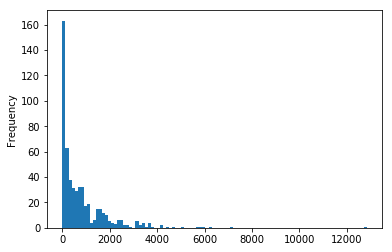

In [219]:
(exp_dis/100).plot.hist(bins=100)

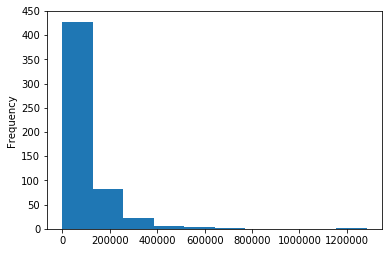

In [237]:
(exp_dis).plot.hist(bins=10)

In [223]:
sorted(exp_dis,reverse=True)

[1284152.0,
 711843.0,
 626650.0,
 593898.0,
 582657.0,
 568636.0,
 509425.0,
 464750.0,
 438747.0,
 420739.0,
 412377.0,
 384832.0,
 370272.0,
 370019.0,
 368069.0,
 366228.0,
 348816.0,
 346185.0,
 343480.0,
 337101.0,
 334342.0,
 332093.0,
 331695.0,
 319760.0,
 316055.0,
 313432.0,
 309520.0,
 308760.0,
 292865.0,
 273695.0,
 271670.0,
 265199.0,
 260149.0,
 256610.0,
 256104.0,
 254258.0,
 250944.0,
 249812.0,
 244115.0,
 241778.0,
 241340.0,
 239462.0,
 234826.0,
 233716.0,
 231515.0,
 224713.0,
 223052.0,
 222320.0,
 217780.0,
 213296.0,
 210826.0,
 209013.0,
 200285.0,
 198072.0,
 196228.0,
 195507.0,
 193191.0,
 192664.0,
 188147.0,
 187031.0,
 185887.0,
 184799.0,
 182501.0,
 182354.0,
 181756.0,
 181488.0,
 180778.0,
 179823.0,
 177917.0,
 177308.0,
 175499.0,
 174264.0,
 173064.0,
 171299.0,
 170773.0,
 170703.0,
 168574.0,
 167978.0,
 167588.0,
 166585.0,
 165955.0,
 165254.0,
 165100.0,
 164891.0,
 162121.0,
 161003.0,
 160832.0,
 160360.0,
 159625.0,
 158758.0,
 157016.0

In [239]:
sorted(exp_dis,reverse=False)[int(len(exp_dis)*0.9)]#/exp_dis[:-1].sum()

198072.0

In [235]:
len(exp_dis)

544

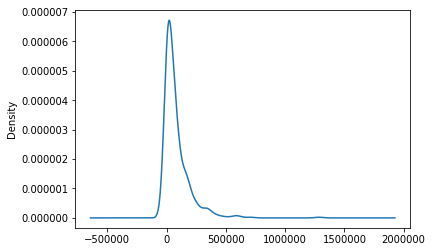

In [217]:
exp_dis[:-1].plot.density()

In [210]:
exp_dis[0].delta

223052000000000

In [242]:
df_ordered.set_index('merchant').loc['faa029c6b0'].head()

,time,amount_usd_in_cents,next_tran_time,time_diff
merchant,,,,
faa029c6b0,2033-08-07 21:47:12,31870,2033-08-10 11:44:44,2 days 13:57:32
faa029c6b0,2033-08-10 11:44:44,32683,2033-08-12 03:31:26,1 days 15:46:42
faa029c6b0,2033-08-12 03:31:26,30860,2033-08-18 17:28:42,6 days 13:57:16
faa029c6b0,2033-08-18 17:28:42,34812,2033-08-25 23:32:52,7 days 06:04:10
faa029c6b0,2033-08-25 23:32:52,15992,2033-08-30 10:26:44,4 days 10:53:52


#### update transform functions

In [356]:
def get_agg_merchants(df):
    start =  df.groupby('merchant')['time'].min().to_frame('start_time')
    end = df.groupby('merchant')['time'].max().to_frame('end_time')
    counts = df.groupby('merchant')['time'].count().to_frame('transaction_counts')
    time_diff = df.groupby('merchant')['time_diff'].mean().to_frame('time_btween')
    total_sales = df.groupby('merchant')['amount_usd_in_cents'].sum().to_frame('total_sales')
    sales_per = df.groupby('merchant')['amount_usd_in_cents'].mean().to_frame('sales_pertrans')
    df['hours'] = df.time.apply(lambda x:x.time().hour)
    time_of_day = df.groupby('merchant')['hours'].mean().to_frame('time_of_day')
    #daily_trans = df.apply(lambda x:x.counts/(x.end_time-x.start_time).days)
    results = start.join(end).join(counts).join(time_diff).join(total_sales).join(sales_per).join(time_of_day)
    return results.sort_values('transaction_counts',ascending=False)

In [351]:
    df['hours'] = df.time.apply(lambda x:x.time().hour)


In [259]:
df_ordered.set_index('merchant').loc['0002b63b92']

time                   2033-05-16 20:07:57
amount_usd_in_cents                   3379
next_tran_time                         NaT
time_diff                              NaN
Name: 0002b63b92, dtype: object

In [260]:
time_diff = df_ordered.groupby('merchant')['time_diff'].mean().to_frame('time_btween')

In [265]:
df_ordered.set_index('merchant').loc['69d984dfd1']

,time,amount_usd_in_cents,next_tran_time,time_diff
merchant,,,,
69d984dfd1,2033-09-19 14:02:05,35562,2033-09-22 14:11:25,259760.0
69d984dfd1,2033-09-22 14:11:25,19292,NaT,NaN


##### all the na from calculate time difference are merchants only have 1 transaction records

In [268]:
sum(time_diff.isna().values)

array([1666])

In [271]:
num_trans[num_trans.counts==1].shape

(1666, 1)

In [275]:
time_diff.shape

(14351, 1)

In [288]:
agg_mer = get_agg_merchants(df_ordered)

In [282]:
agg_mer.dropna(inplace=True)
agg_mer.shape[0]-14351 # should be -1666, the merchants with only 1 history


-1666

In [289]:
agg_mer.head()

,start_time,end_time,transaction_counts,time_btween,total_sales
merchant,,,,,
5608f200cf,2033-03-29 21:21:57,2034-12-31 04:44:54,25512,2171.964133,20911571
53b3fbeae2,2033-11-29 20:40:04,2034-12-31 06:13:56,12178,2812.583723,60733740
1ddaea9838,2033-01-03 15:16:32,2034-12-31 07:23:54,12042,5214.221576,41443545
89e2d29885,2033-01-25 21:56:56,2034-12-31 02:05:34,11969,5083.599432,18054500
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222,5529.964263,151116295


In [298]:
agg_mer['total_days'] = (agg_mer.end_time-agg_mer.start_time).apply(lambda x:x.days)#pd.Timedelta.total_seconds)

In [299]:
agg_mer['trans_perday'] = agg_mer.transaction_counts/agg_mer.total_days

In [300]:
agg_mer['sales_perday'] = agg_mer.total_sales/agg_mer.total_days


In [315]:
def feature_eng(agg_mer):
    agg_mer['total_days'] = (agg_mer.end_time-agg_mer.start_time).apply(lambda x:x.days)+1
    agg_mer['trans_perday'] = agg_mer.transaction_counts/agg_mer.total_days
    agg_mer['sales_perday'] = agg_mer.total_sales/agg_mer.total_days
    return agg_mer

In [357]:
agg_mer = get_agg_merchants(df_ordered)
agg_mer = feature_eng(agg_mer)
agg_mer.dropna(inplace=True)

In [358]:
agg_mer[100:110]

,start_time,end_time,transaction_counts,time_btween,total_sales,sales_pertrans,time_of_day,total_days,trans_perday,sales_perday
merchant,,,,,,,,,,
e53c9543bc,2033-04-09 15:12:05,2034-12-30 18:11:54,2342,23256.210594,14590378,6229.879590,17.578992,631,3.711569,23122.627575
d503cb6f1c,2033-06-17 16:59:34,2034-12-31 06:43:00,2337,20770.464897,58278766,24937.426615,7.947368,562,4.158363,103698.871886
8ca23d4d9e,2033-11-21 17:02:13,2034-12-31 00:01:35,2333,14978.885935,10748812,4607.291899,14.714102,405,5.760494,26540.276543
ee57011cd9,2033-02-15 21:50:45,2034-12-31 05:56:00,2332,25328.320463,27499801,11792.367496,12.433105,684,3.409357,40204.387427
062de5273b,2033-12-01 17:11:26,2034-12-31 04:13:49,2320,14696.568780,19323701,8329.181466,13.057759,395,5.873418,48920.762025
b0276c5ff2,2033-06-18 21:12:26,2034-12-30 23:58:13,2287,21169.705599,6546314,2862.402274,16.912112,561,4.076649,11669.008913
81512d8413,2033-01-01 16:16:19,2034-12-31 03:02:16,2260,27860.981408,12791115,5659.785398,15.000885,729,3.100137,17546.111111
727f440092,2033-02-17 15:11:03,2034-12-31 02:00:46,2255,26121.287933,18341646,8133.767627,15.719734,682,3.306452,26893.909091
8def055c22,2033-04-16 06:17:21,2034-12-31 07:53:06,2229,24200.783214,28684840,12868.927770,8.252580,625,3.566400,45895.744000


### findings with merchant data
* average 381.04 per transaction
* lots of 1 day 1 transactions
* daily volumn avarage at 274
* average trades in two years 105
* total sales average at 16332
* total days about 200 days

In [317]:
agg_mer.describe()

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday
count,14351.000000,1.268500e+04,1.435100e+04,1.435100e+04,14351.000000,14351.000000,1.435100e+04
mean,105.478294,1.867858e+06,1.633296e+06,3.810458e+04,200.478085,1.425003,2.738763e+04
std,527.717966,3.555165e+06,6.431726e+06,1.415186e+05,203.849367,28.710780,3.873150e+05
min,1.000000,1.580280e+01,2.010000e+02,2.010000e+02,1.000000,0.002759,2.661642e+00
25%,3.000000,1.720393e+05,3.626300e+04,5.738182e+03,18.000000,0.060241,7.571081e+02
50%,11.000000,6.637375e+05,1.602620e+05,1.096500e+04,128.000000,0.200000,2.949425e+03
75%,45.000000,2.010619e+06,8.230995e+05,2.732122e+04,349.000000,1.000000,1.093586e+04
max,25512.000000,6.261378e+07,2.369072e+08,8.887465e+06,729.000000,3358.000000,4.384030e+07


### finding for trans per day
* more than 10% merchants have exactly 1 trade per day, seems reasonalby to cluster them together
* weekly also here, twice per day, once every other day, 4 days, 1 week


In [372]:
agg_mer.trans_perday.value_counts().reset_index()[:15]#.to_numpy()

,index,trans_perday
0,1.000000,1772
1,2.000000,242
2,0.250000,103
3,0.500000,102
4,0.285714,70
5,0.142857,66
6,0.333333,65
7,3.000000,62
8,0.666667,54
9,0.200000,50


In [371]:
1/agg_mer.trans_perday.value_counts().index[:15]#.loc[7]

Float64Index([               1.0,                0.5,                4.0,
                             2.0,                3.5,                7.0,
                             3.0, 0.3333333333333333,                1.5,
                             5.0,                6.0,               14.0,
                             7.5,               10.0,               0.25],
             dtype='float64')

In [370]:
agg_mer.trans_perday.value_counts().loc[30]

4

In [333]:
agg_mer.shape

(14351, 9)

In [334]:
df.head()

,merchant,time,amount_usd_in_cents,next_tran_time,time_diff
1,faa029c6b0,2034-06-17 23:34:14,6349,2034-03-01 14:11:27,-109 days +14:37:13
2,ed7a7d91aa,2034-12-27 00:40:38,3854,2034-12-03 13:46:11,-24 days +13:05:33
3,5608f200cf,2034-04-30 01:29:42,789,2034-11-28 07:20:23,212 days 05:50:41
4,15b1a0d61e,2034-09-16 01:06:23,4452,2034-09-13 20:42:45,-3 days +19:36:22
5,4770051790,2034-07-22 16:21:42,20203,2034-12-28 21:32:10,159 days 05:10:28


In [340]:
df.time.iloc[0].time().hour

23

In [361]:
def get_time_of_day(time):
    #aa = time.apply(lambda x:x.time().hour)
    b = [0,4,8,12,16,20,24]
    l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
    return pd.cut(time, bins=b, labels=l, include_lowest=True)

In [350]:
get_time_of_day(df.head().time)

1         Night
2    Late Night
3    Late Night
4    Late Night
5          Noon
Name: time, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Eve' < 'Night']

In [344]:
aa = df.head().time.apply(lambda x:x.time().hour)

In [347]:
    b = [0,4,8,12,16,20,24]
    l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
    pd.cut(aa, bins=b, labels=l, include_lowest=True)

1         Night
2    Late Night
3    Late Night
4    Late Night
5          Noon
Name: time, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Eve' < 'Night']

In [362]:
agg_mer['time_of_day'] = get_time_of_day(agg_mer.time_of_day)

In [363]:
agg_mer.head()

,start_time,end_time,transaction_counts,time_btween,total_sales,sales_pertrans,time_of_day,total_days,trans_perday,sales_perday
merchant,,,,,,,,,,
5608f200cf,2033-03-29 21:21:57,2034-12-31 04:44:54,25512,2171.964133,20911571,819.675878,Morning,642,39.738318,32572.540498
53b3fbeae2,2033-11-29 20:40:04,2034-12-31 06:13:56,12178,2812.583723,60733740,4987.168665,Morning,397,30.675063,152981.712846
1ddaea9838,2033-01-03 15:16:32,2034-12-31 07:23:54,12042,5214.221576,41443545,3441.583209,Noon,727,16.563961,57006.251719
89e2d29885,2033-01-25 21:56:56,2034-12-31 02:05:34,11969,5083.599432,18054500,1508.438466,Noon,705,16.977305,25609.219858
654930c922,2033-01-11 19:03:11,2034-12-30 23:38:40,11222,5529.964263,151116295,13466.075120,Morning,719,15.607789,210175.653686


### model training

In [389]:
train = agg_mer.drop(['start_time','end_time'], axis=1)
train = pd.get_dummies(train)
train.dropna(inplace=True)

In [377]:
train.head()

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night
merchant,,,,,,,,,,,,,
5608f200cf,25512,2171.964133,20911571,819.675878,642,39.738318,32572.540498,0,0,1,0,0,0
53b3fbeae2,12178,2812.583723,60733740,4987.168665,397,30.675063,152981.712846,0,0,1,0,0,0
1ddaea9838,12042,5214.221576,41443545,3441.583209,727,16.563961,57006.251719,0,0,0,1,0,0
89e2d29885,11969,5083.599432,18054500,1508.438466,705,16.977305,25609.219858,0,0,0,1,0,0
654930c922,11222,5529.964263,151116295,13466.075120,719,15.607789,210175.653686,0,0,1,0,0,0


In [413]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = train
pd.DataFrame([variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))],index=X.columns)

,0
transaction_counts,1.701138
time_btween,1.098322
total_sales,1.845998
sales_pertrans,1.057135
total_days,1.221244
trans_perday,30.126352
sales_perday,30.331779
time_of_day_Late Night,1.015468
time_of_day_Early Morning,1.055382
time_of_day_Morning,1.350447


In [417]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X.drop('trans_perday', axis=1)
pd.DataFrame([variance_inflation_factor(vif_data.values, i)
                          for i in range(len(vif_data.columns))],index=vif_data.columns)

,0
transaction_counts,1.617516
time_btween,1.098317
total_sales,1.708606
sales_pertrans,1.047466
total_days,1.218074
sales_perday,1.022962
time_of_day_Late Night,1.015342
time_of_day_Early Morning,1.055026
time_of_day_Morning,1.350315
time_of_day_Noon,1.892199


In [391]:
X_stan = StandardScaler().fit_transform(train)


In [381]:
import pandas as pd
import numpy as np
import time

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from silhouette import silhouette
import matplotlib.cm as cm
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from scipy.stats import norm, kurtosis



%matplotlib inline


#### EM model train

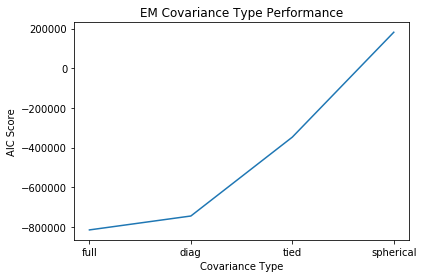

In [392]:

from sklearn.mixture import GaussianMixture
co_type = ['full','diag','tied','spherical']
gm_co_scores = []
aics = []
for t in co_type:
    gm = GaussianMixture(n_components=6, random_state=10,covariance_type=t)
    gm_co = gm.fit_predict(X_stan)
    gm_co_scores.append(silhouette_score(X_stan,gm_co))
    aics.append(gm.aic(X_stan))
plt.title('EM Covariance Type Performance')
plt.xlabel('Covariance Type')
plt.ylabel('AIC Score')
plt.xticks(range(4),co_type)
#plt.plot(gm_co_scores)
plt.plot(aics)

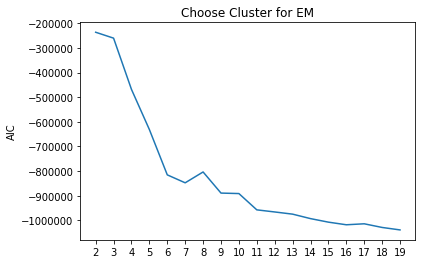

In [393]:
import time

d = X_stan

start = time.time()
ks = [2,4,6,8,10]
ks = range(2,20)
total = []
scores = []
for k in ks:
    #print(k)
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(d)
    total.append(gms.aic(d))
    cluster_labels = gms.fit_predict(d)
    scores.append(silhouette_score(d, cluster_labels))

    #print(time.time()-start)
plt.xticks(range(len(ks)), ks)
plt.title('Choose Cluster for EM')
plt.ylabel('AIC')
plt.plot(total)

### Kmeans

In [394]:
from scipy.spatial.distance import cdist 

def kmeans_elbow(K,X_stan,seed=0):
    distortions = [] 
    inertias = [] 
    silhouette_avg = []
    mapping1 = {} 
    mapping2 = {} 

    for k in K: 
        #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k,random_state=seed).fit(X_stan) 

        distortions.append(sum(np.min(cdist(X_stan, kmeanModel.cluster_centers_, 
                          'euclidean'),axis=1)) / X_stan.shape[0]) 
        inertias.append(kmeanModel.inertia_) 
        silhouette_avg.append(silhouette_score(X_stan, kmeanModel.predict(X_stan)))

    return silhouette_avg,distortions,inertias

In [397]:
K[4:-1]

[]

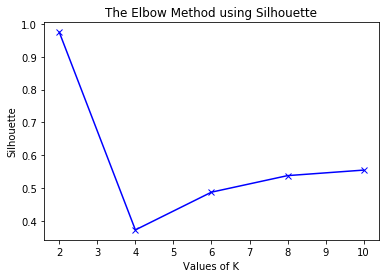

In [398]:
K = [2,4,6,8,10]
#K = [2,5,10,20,30,50,100]

#K = range(2,20)

sih,distortions,inertias = kmeans_elbow(K,X_stan,seed = 10)


plt.plot(K, sih, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette') 
plt.title('The Elbow Method using Silhouette') 
plt.show()

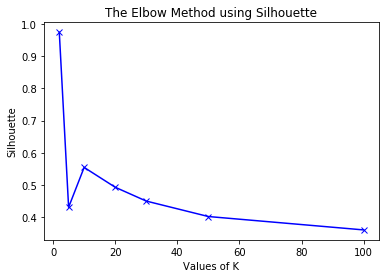

In [399]:
#K = [2,4,6,8,10]
K = [2,5,10,20,30,50,100]

#K = range(2,20)

sih,distortions,inertias = kmeans_elbow(K,X_stan,seed = 10)


plt.plot(K, sih, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette') 
plt.title('The Elbow Method using Silhouette') 
plt.show()

### silhouse visualization

For n_clusters = 2 The average silhouette_score is : 0.9744634807307608
For n_clusters = 3 The average silhouette_score is : 0.2788131251623888
For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 5 The average silhouette_score is : 0.4309128692302579
For n_clusters = 6 The average silhouette_score is : 0.4875105314501871


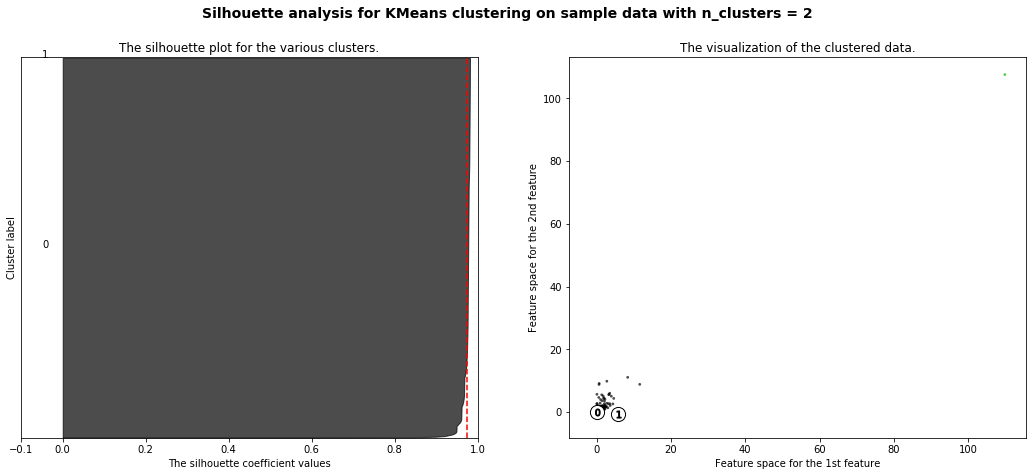

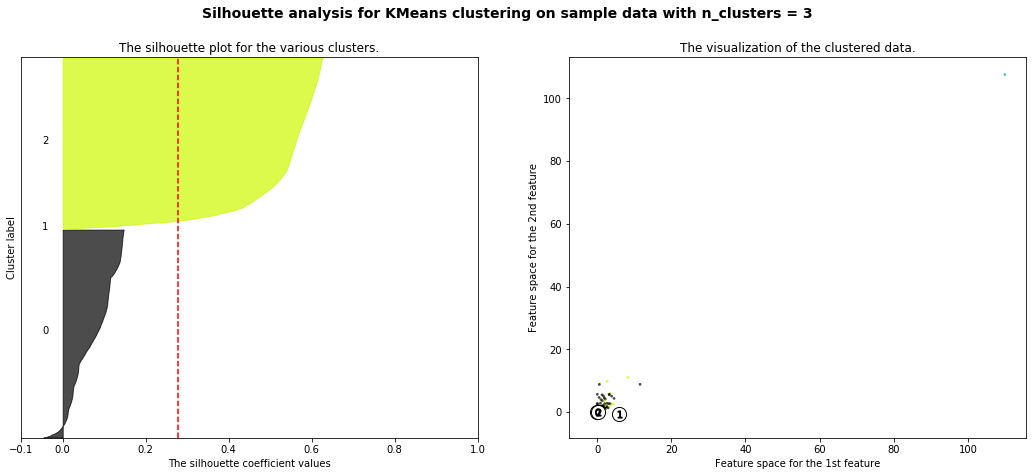

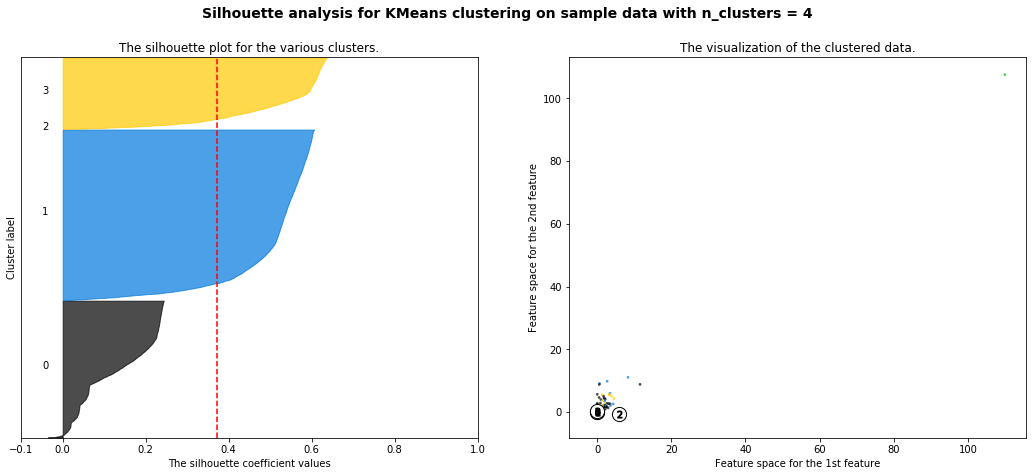

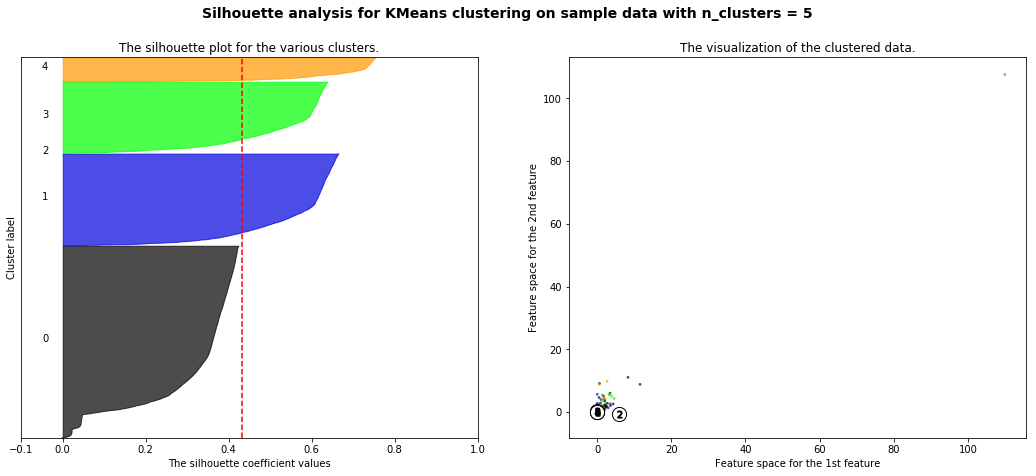

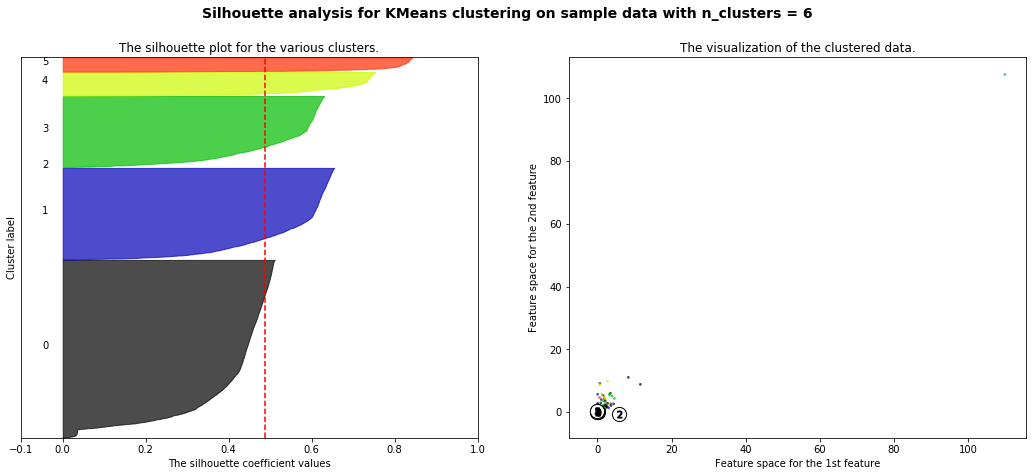

In [445]:
range_n_clusters = [2, 3, 4, 5, 6]
X = X_stan
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 5], X[:, 6], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [444]:
X.head()

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night
merchant,,,,,,,,,,,,,
5608f200cf,25512,2171.964133,20911571,819.675878,642,39.738318,32572.540498,0,0,1,0,0,0
53b3fbeae2,12178,2812.583723,60733740,4987.168665,397,30.675063,152981.712846,0,0,1,0,0,0
1ddaea9838,12042,5214.221576,41443545,3441.583209,727,16.563961,57006.251719,0,0,0,1,0,0
89e2d29885,11969,5083.599432,18054500,1508.438466,705,16.977305,25609.219858,0,0,0,1,0,0
654930c922,11222,5529.964263,151116295,13466.075120,719,15.607789,210175.653686,0,0,1,0,0,0


For n_clusters = 2 The average silhouette_score is : 0.9744634807307608
For n_clusters = 3 The average silhouette_score is : 0.2788131251623888
For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 5 The average silhouette_score is : 0.4309128692302579
For n_clusters = 6 The average silhouette_score is : 0.4875105314501871


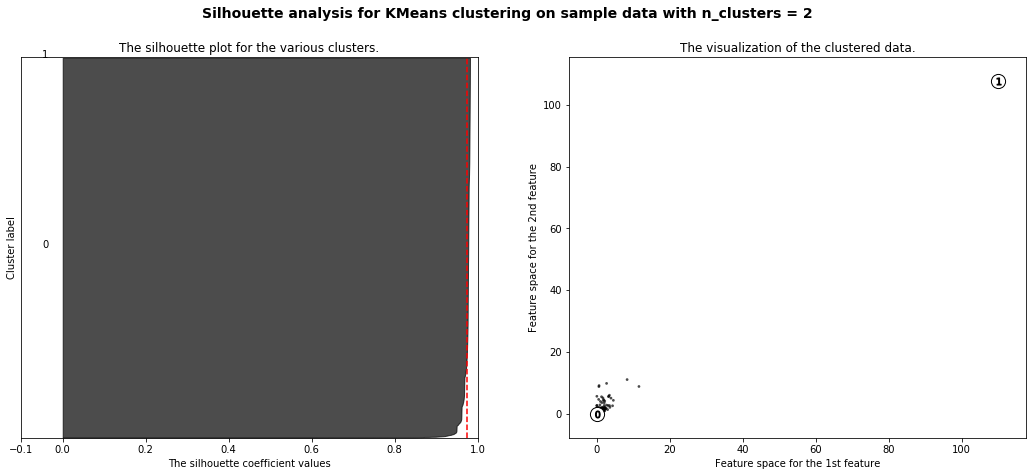

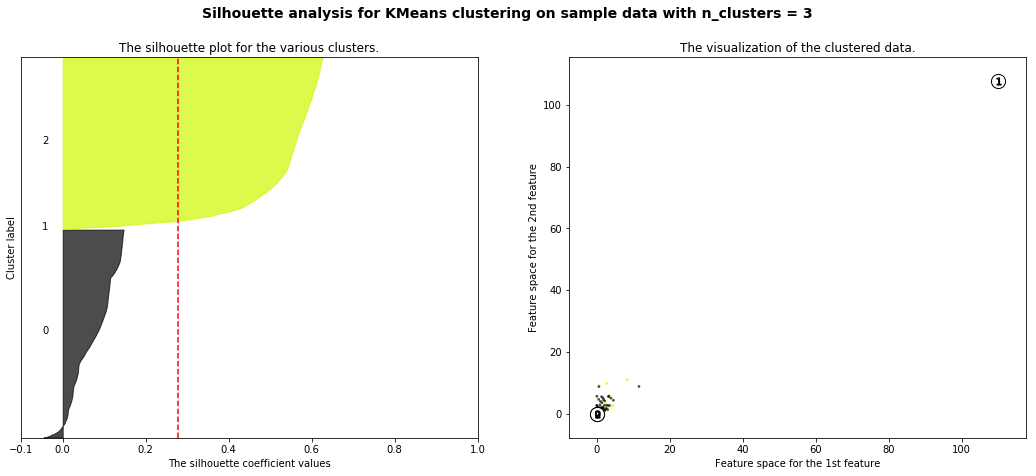

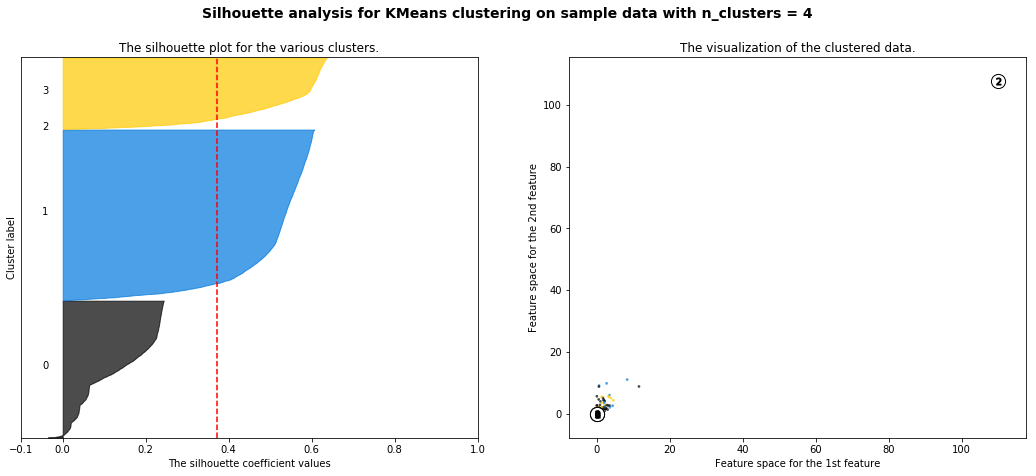

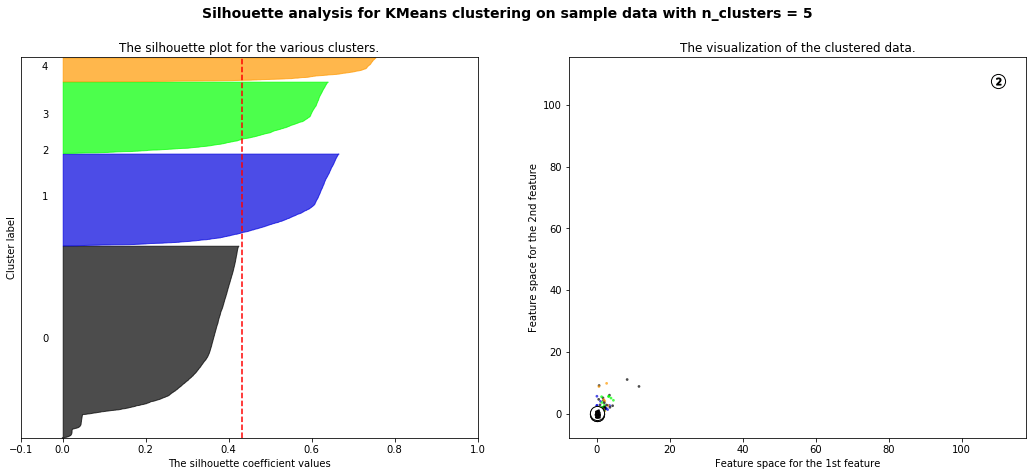

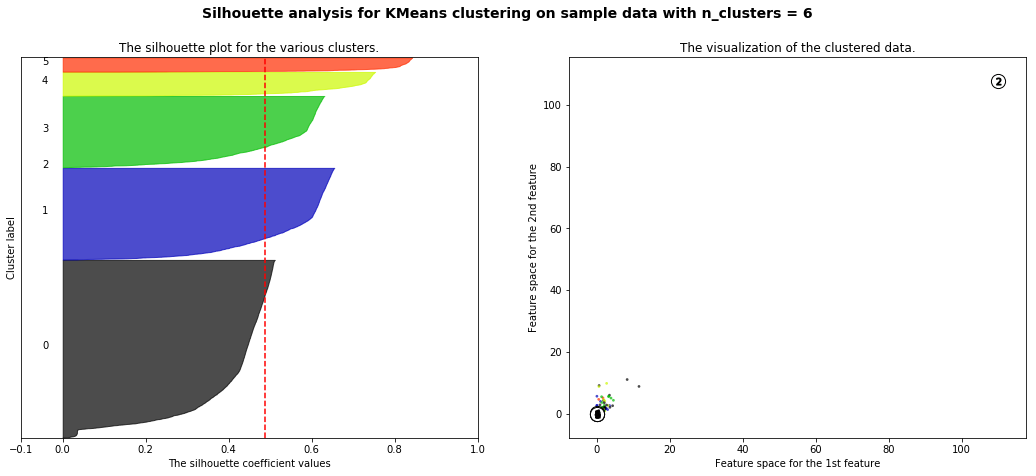

In [459]:
range_n_clusters = [2, 3, 4, 5, 6]
X = X_stan
#X = train.to_numpy()
silhouette(X_stan, range_n_clusters, columns=[5,6])

In [457]:
train.iloc[:,5:7].describe()

,trans_perday,sales_perday
count,12685.000000,1.268500e+04
mean,1.480821,2.266213e+04
std,30.537718,4.073084e+05
min,0.002759,2.661642e+00
25%,0.052117,6.390294e+02
50%,0.147059,2.318867e+03
75%,0.527778,8.123382e+03
max,3358.000000,4.384030e+07


In [406]:
import numpy as np
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=4)
pca.fit(train)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[7.86976035e-01 2.09954748e-01 2.75792626e-03 3.11286475e-04]
[7.69077762e+08 3.97239430e+08 4.55282362e+07 1.52957095e+07]


In [405]:
train.shape

(12685, 13)

In [418]:
import numpy as np
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=4)
pca.fit(vif_data)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[7.86976035e-01 2.09954748e-01 2.75792625e-03 3.11286475e-04]
[7.69077762e+08 3.97239430e+08 4.55282360e+07 1.52957095e+07]


In [411]:
X.columns

Index(['transaction_counts', 'time_btween', 'total_sales', 'sales_pertrans',
       'total_days', 'trans_perday', 'sales_perday', 'time_of_day_Late Night',
       'time_of_day_Early Morning', 'time_of_day_Morning', 'time_of_day_Noon',
       'time_of_day_Eve', 'time_of_day_Night'],
      dtype='object')

In [419]:
aa = np.random.randn(100)

In [434]:
bb = 0.9*aa+0.1*np.random.randn(100)
test_col = pd.DataFrame(np.stack([aa,bb]).T)

In [439]:
test_col['mul'] = aa*bb
test_col['dev'] = aa/bb
#test_col['amount'] = np.random.randint(1,10,100)
#test_col['something'] = aa*test_col.amount

In [441]:
test_col.head()

,0,1,mul,dev,amount,something
0,0.701335,0.579527,0.406442,1.210185,3,2.104005
1,-0.377603,-0.316023,0.119331,1.194858,5,-1.888013
2,-1.796971,-1.564786,2.811876,1.148381,2,-3.593942
3,-0.842926,-0.697257,0.587736,1.208917,6,-5.057557
4,-0.086573,-0.113772,0.009850,0.760941,6,-0.519440


In [443]:
import numpy as np
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=4)
pca.fit(test_col.drop(['amount','something'], axis=1))

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.38982533 0.36064546 0.24820863 0.00132059]
[14.01373908 13.47904841 11.18220466  0.81564798]


In [460]:
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [461]:
n_clusters

6

In [465]:
pd.DataFrame(cluster_labels).value_counts()

0    5954
1    3075
3    2389
4     796
5     470
2       1
dtype: int64

In [467]:
np.where(cluster_labels==2)

(array([59], dtype=int64),)

In [468]:
len(cluster_labels)

12685

In [469]:
X.shape

(12685, 13)

In [472]:
train[59:60]

,transaction_counts,time_btween,total_sales,sales_pertrans,total_days,trans_perday,sales_perday,time_of_day_Late Night,time_of_day_Early Morning,time_of_day_Morning,time_of_day_Noon,time_of_day_Eve,time_of_day_Night
merchant,,,,,,,,,,,,,
0b0ea71d37,3358,15.8028,43840305,13055.480941,1,3358.0,43840305.0,0,1,0,0,0,0


In [475]:
df_ordered.set_index('merchant').loc['0b0ea71d37']

,time,amount_usd_in_cents,next_tran_time,time_diff,hours
merchant,,,,,
0b0ea71d37,2034-08-06 18:06:39,12342,2034-08-06 18:13:00,381.0,18
0b0ea71d37,2034-08-06 18:13:00,11184,2034-08-06 18:18:33,333.0,18
0b0ea71d37,2034-08-06 18:18:33,9106,2034-08-06 18:19:02,29.0,18
0b0ea71d37,2034-08-06 18:19:02,57335,2034-08-06 18:22:31,209.0,18
0b0ea71d37,2034-08-06 18:22:31,22217,2034-08-06 18:26:04,213.0,18
...,...,...,...,...,...
0b0ea71d37,2034-08-07 08:36:42,8486,2034-08-07 08:36:46,4.0,8
0b0ea71d37,2034-08-07 08:36:46,8486,2034-08-07 08:38:34,108.0,8
0b0ea71d37,2034-08-07 08:38:34,9495,2034-08-07 08:42:05,211.0,8


In [ ]:
silhouette(X)

In [478]:
X[58]

array([ 5.80132902, -0.52015476,  2.93332136, -0.20567771,  2.47788411,
        0.10275681,  0.01786924, -0.14062898, -0.25892546, -0.56603125,
        1.10593783, -0.48157264, -0.19615627])

In [477]:
X_stan[58]

array([ 5.80132902, -0.52015476,  2.93332136, -0.20567771,  2.47788411,
        0.10275681,  0.01786924, -0.14062898, -0.25892546, -0.56603125,
        1.10593783, -0.48157264, -0.19615627])

For n_clusters = 2 The average silhouette_score is : 0.9744634807307608
For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 6 The average silhouette_score is : 0.4875105314501871
For n_clusters = 8 The average silhouette_score is : 0.5378635087964246
For n_clusters = 10 The average silhouette_score is : 0.5547016030516388
For n_clusters = 12 The average silhouette_score is : 0.5058754895768598
For n_clusters = 14 The average silhouette_score is : 0.4745469136596589


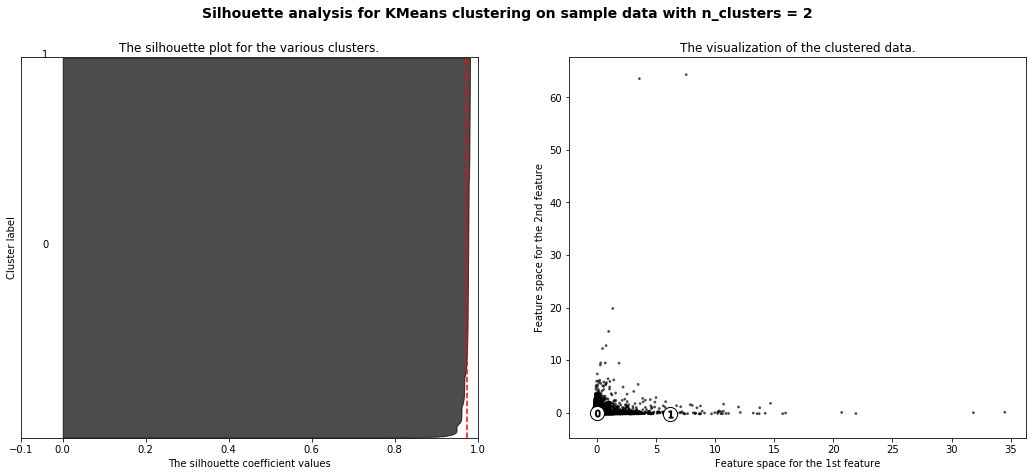

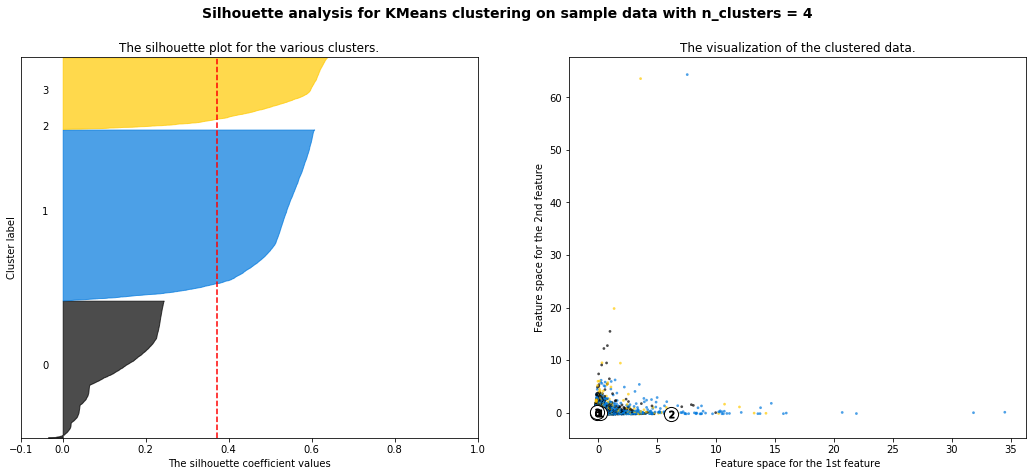

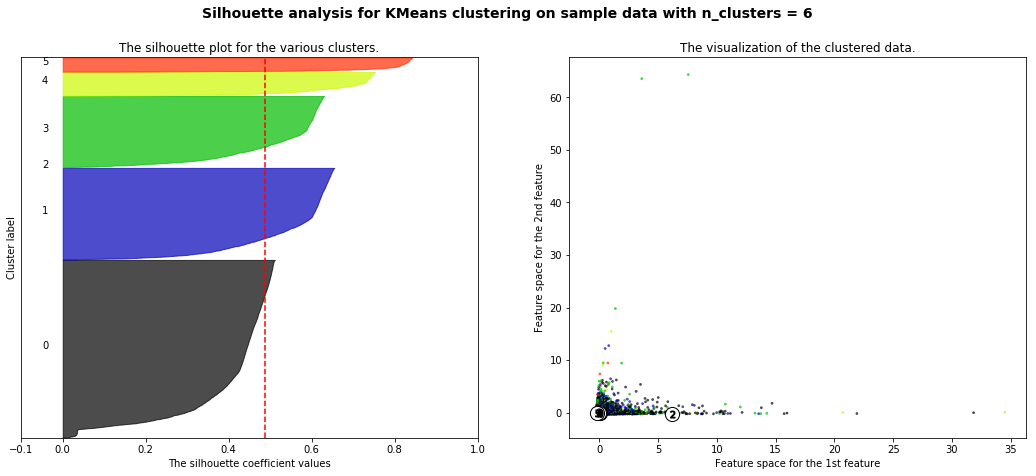

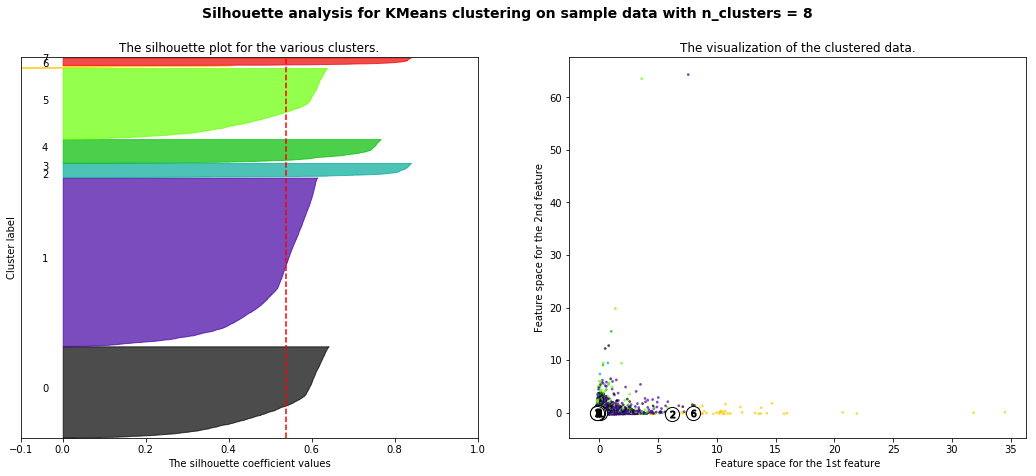

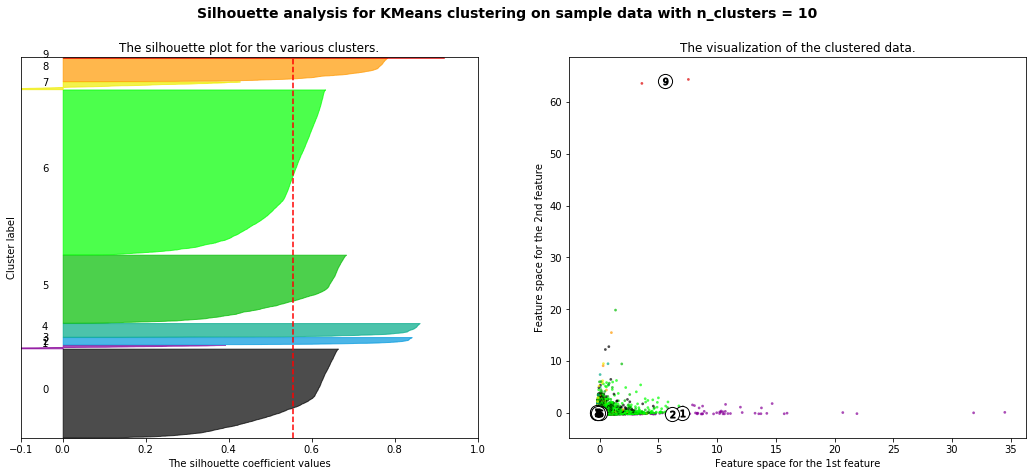

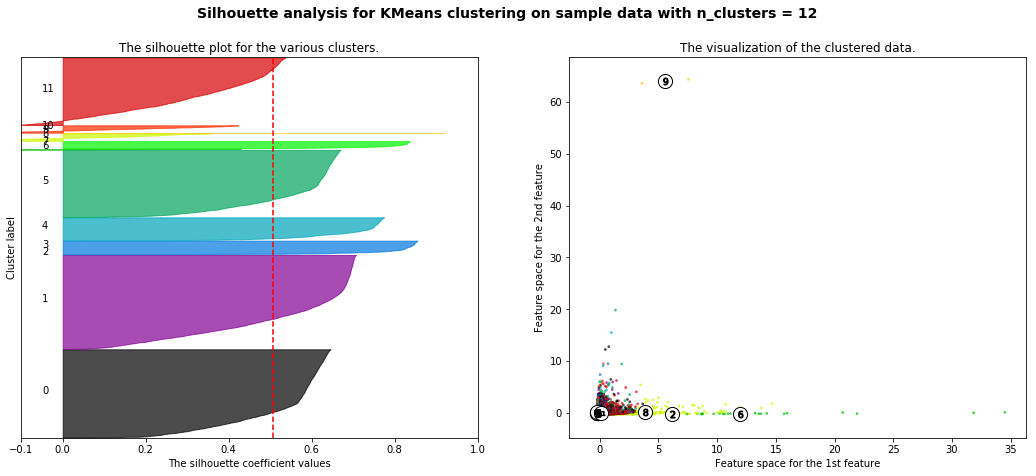

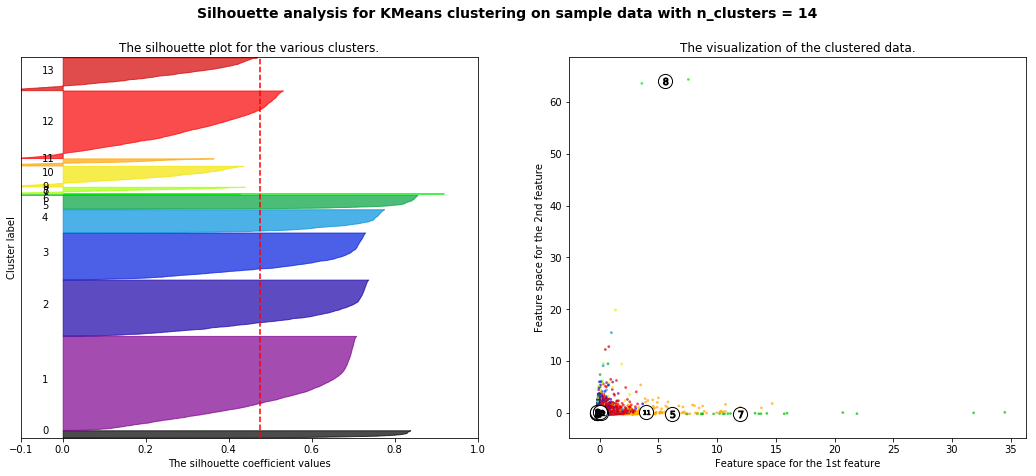

In [496]:
range_n_clusters = [2, 4,6,8,10,12,14]
no_outlier = np.concatenate([X_stan[:58],X_stan[59:]])
#X = train.to_numpy()
silhouette(X_stan, range_n_clusters, columns=[2,3])

For n_clusters = 2 The average silhouette_score is : 0.9744634807307608
For n_clusters = 4 The average silhouette_score is : 0.37253279211764617
For n_clusters = 6 The average silhouette_score is : 0.4875105314501871
For n_clusters = 8 The average silhouette_score is : 0.5378635087964246
For n_clusters = 10 The average silhouette_score is : 0.5547016030516388
For n_clusters = 12 The average silhouette_score is : 0.5058754895768598
For n_clusters = 14 The average silhouette_score is : 0.4745469136596589


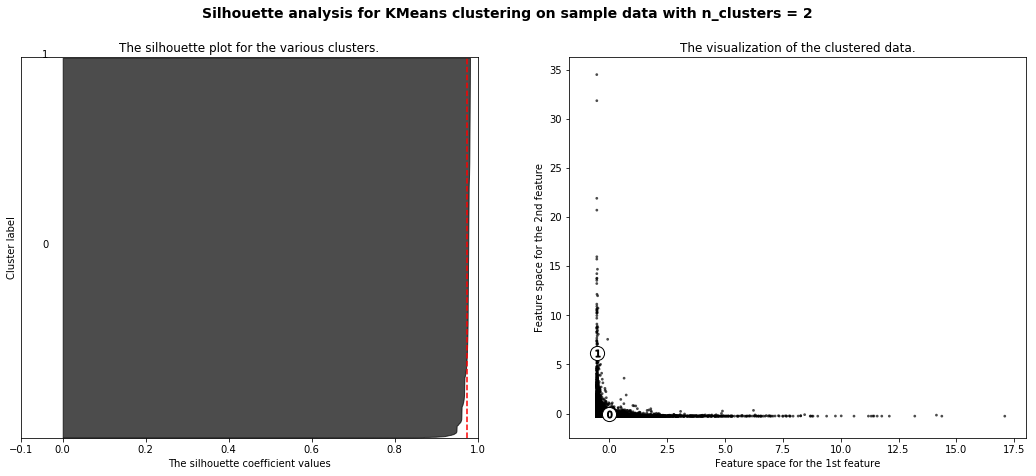

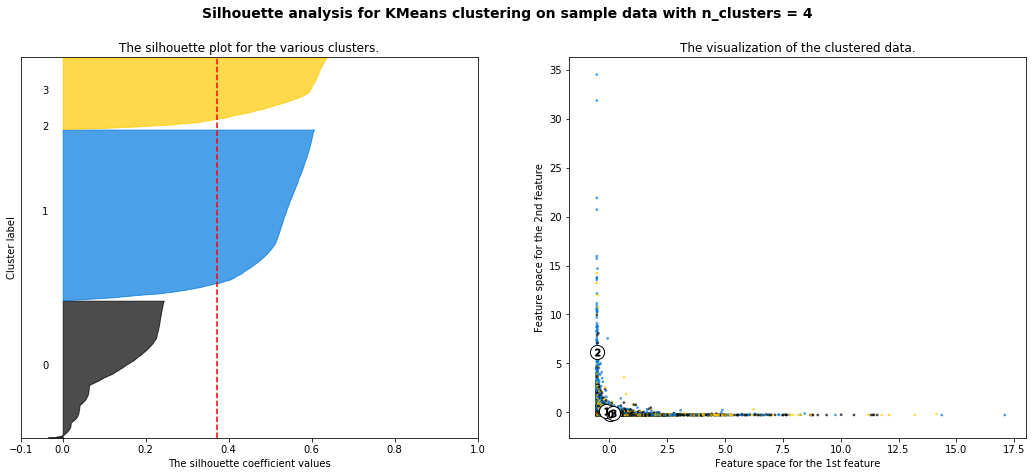

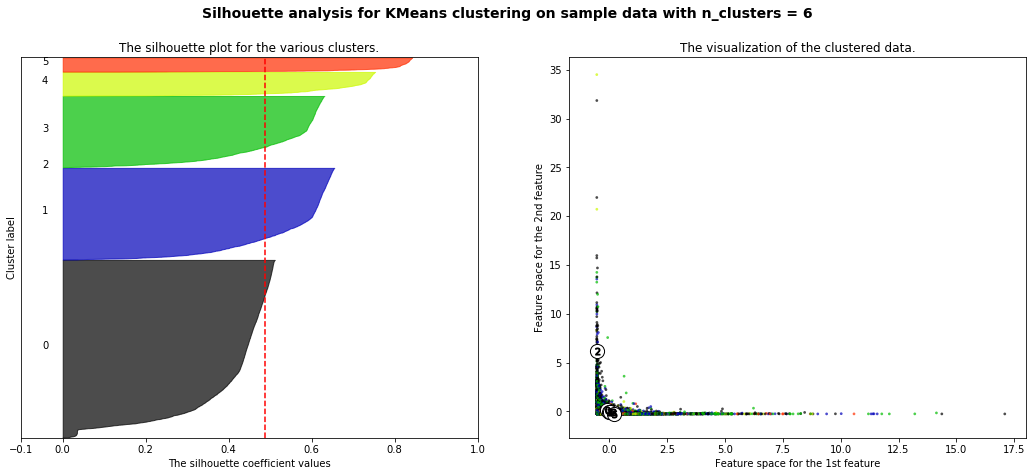

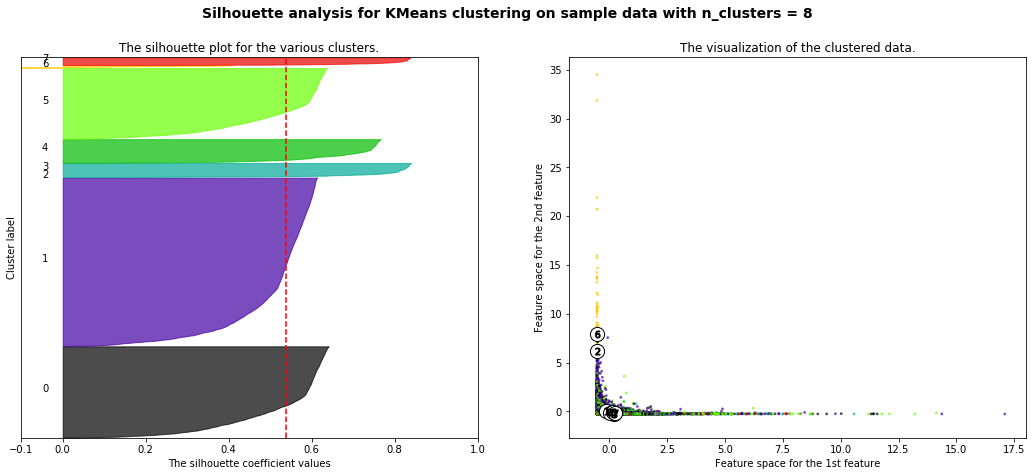

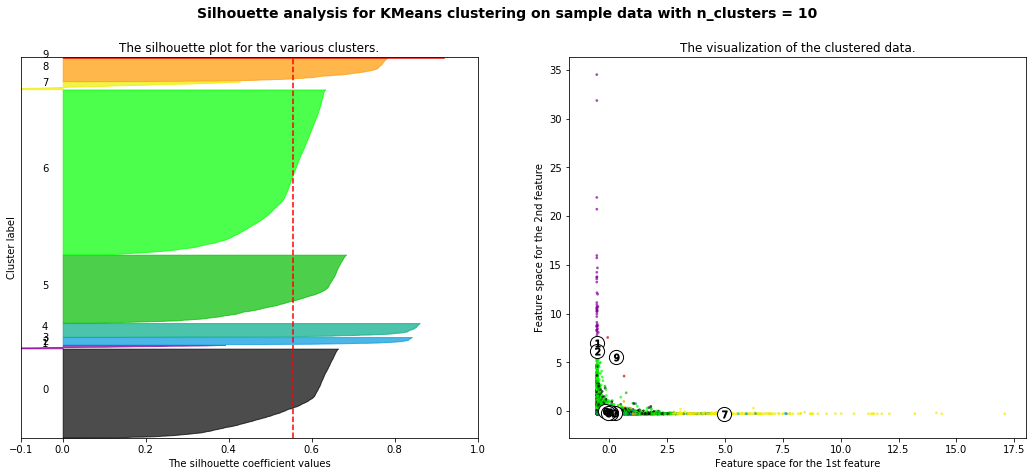

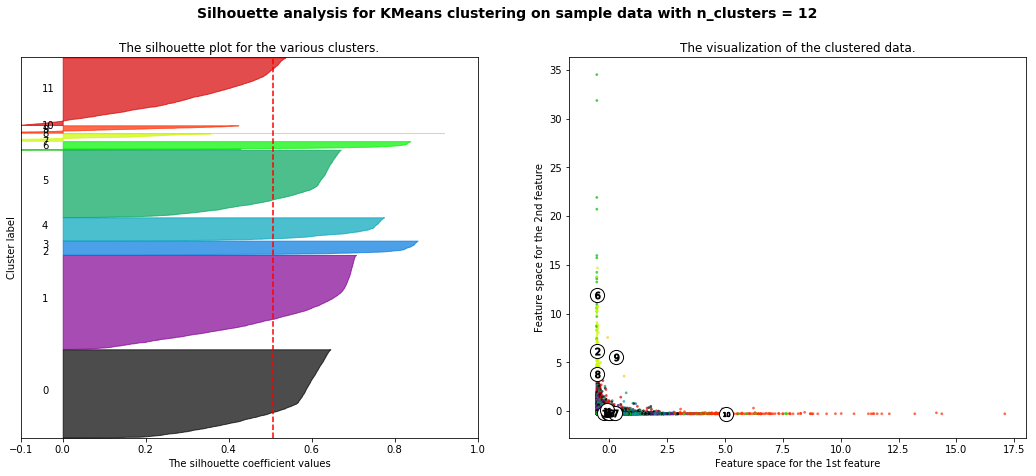

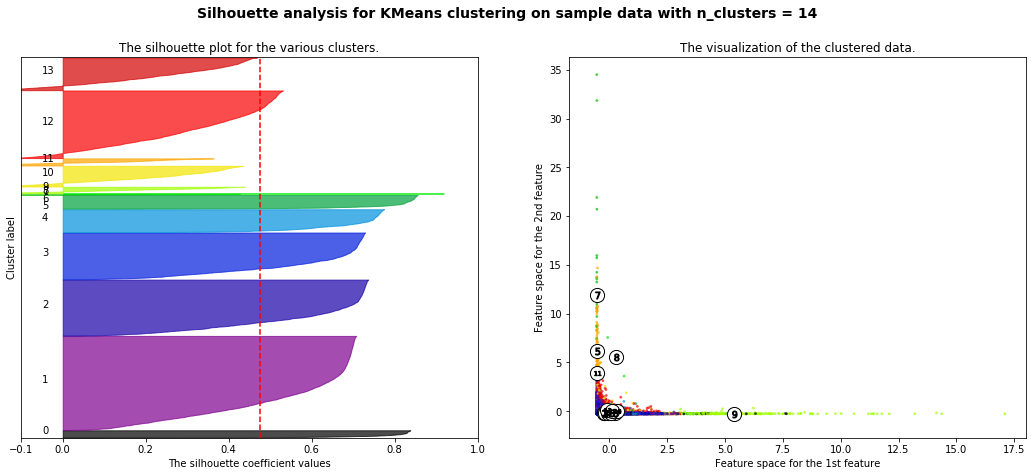

In [497]:
range_n_clusters = [2, 4,6,8,10,12,14]
no_outlier = np.concatenate([X_stan[:58],X_stan[59:]])
#X = train.to_numpy()
silhouette(X_stan, range_n_clusters, columns=[1,2])

In [487]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04,1.268500e+04
mean,6.558193e-16,-1.590984e-16,1.208751e-15,1.968797e-16,3.823858e-16,6.232478e-17,-4.088340e-17,-1.249677e-14,-1.606353e-15,3.464911e-15,2.137828e-14,-1.146986e-14,-9.079804e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-2.093467e-01,-5.254091e-01,-2.699066e-01,-2.512866e-01,-1.113229e+00,-4.840311e-02,-5.563441e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,-9.042100e-01,-4.815726e-01,-1.961563e-01
25%,-2.039880e-01,-4.770202e-01,-2.622984e-01,-2.113305e-01,-9.060497e-01,-4.678673e-02,-5.407198e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,-9.042100e-01,-4.815726e-01,-1.961563e-01
50%,-1.879119e-01,-3.387095e-01,-2.379579e-01,-1.764454e-01,-2.795780e-01,-4.367761e-02,-4.994757e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,-9.042100e-01,-4.815726e-01,-1.961563e-01
75%,-1.128901e-01,4.015750e-02,-1.168409e-01,-7.098778e-02,7.612530e-01,-3.120995e-02,-3.569610e-02,-1.406290e-01,-2.589255e-01,-5.660313e-01,1.105938e+00,-4.815726e-01,-1.961563e-01
max,4.535747e+01,1.708734e+01,3.449910e+01,6.432970e+01,2.477884e+00,1.099182e+02,1.075828e+02,7.110910e+00,3.862115e+00,1.766687e+00,1.105938e+00,2.076530e+00,5.097976e+00


In [492]:
X.max(axis=0)   

array([ 45.35746989,  17.08733988,  34.4990988 ,  64.32970455,
         2.47788411, 109.91821612, 107.58277189,   7.11090997,
         3.86211532,   1.7666869 ,   1.10593783,   2.07652993,
         5.09797624])

In [493]:
train.columns

Index(['transaction_counts', 'time_btween', 'total_sales', 'sales_pertrans',
       'total_days', 'trans_perday', 'sales_perday', 'time_of_day_Late Night',
       'time_of_day_Early Morning', 'time_of_day_Morning', 'time_of_day_Noon',
       'time_of_day_Eve', 'time_of_day_Night'],
      dtype='object')

### Q2: Churn prediction
#### Define Churn
use a days between transactions distribution(normal, poisson or exponential), time interval 1 week, 1 day, 1 month?
get the exponential and determine threshold for churn. would be nice to have label.
* calcuate individual distribution according to clustering label in q1
* two way to get the cut off threshold: 1 assume exponential, then use reverse cdf to get 0.9; 2. use empirical number then cut 0.9 point; if has churn label, this could be decided